### 1. Importing Libraries


In [2]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

### 2. Importing and Exploration of the dataset


In [3]:
# loading the data and setting the unique client_id as the index::
df = pd.read_csv('loans.csv', index_col='client_id')


In [4]:
# # showing the first 5 rows of the dataset:
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [5]:
# To check the Dimensions of the dataset:
df.shape



(443, 7)

In [6]:
# Checking the info of the data:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


### 3. Checking the datatypes of the columns


### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type


In [7]:
# loan_id:
df['loan_id'] = df['loan_id'].astype(str)

# repaid:
df['repaid'] = df['repaid'].astype('category')

In [8]:
# loan_start:
df['loan_start'] = pd.to_datetime(df['loan_start'])

# loan_end:
df['loan_end'] = pd.to_datetime(df['loan_end'])


#### Checking the datatypes again:


In [10]:
df.dtypes
print(df.dtypes)

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object


### 5. Summary Statistics of the data


In [11]:
# Summary Statistics for Numerical data:
print("Summary Statistics for Numerical Data:\n")
print(df.describe())


Summary Statistics for Numerical Data:

        loan_amount                     loan_start  \
count    443.000000                            443   
mean    7982.311512  2007-08-02 12:56:53.092550912   
min      559.000000            2000-01-26 00:00:00   
25%     4232.500000            2003-10-19 00:00:00   
50%     8320.000000            2007-03-10 00:00:00   
75%    11739.000000            2011-07-31 00:00:00   
max    14971.000000            2014-11-11 00:00:00   
std     4172.891992                            NaN   

                            loan_end        rate  
count                            443  443.000000  
mean   2009-08-23 11:35:37.246049536    3.217156  
min              2001-08-02 00:00:00    0.010000  
25%              2005-09-12 12:00:00    1.220000  
50%              2009-03-19 00:00:00    2.780000  
75%              2013-09-11 12:00:00    4.750000  
max              2017-05-07 00:00:00   12.620000  
std                              NaN    2.397168  


In [12]:
# Summary Statistics for Categorical data:
print("\nSummary Statistics for Categorical Data:\n")
print(df.describe(include=['object', 'category']))



Summary Statistics for Categorical Data:

       loan_type  repaid loan_id
count        443     443     443
unique         4       2     443
top         home       1   11434
freq         121     237       1


### 6. Missing Values


In [13]:
# use isnull().sum() to check for missing values 
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())



Missing Values in Each Column:

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


---


### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.


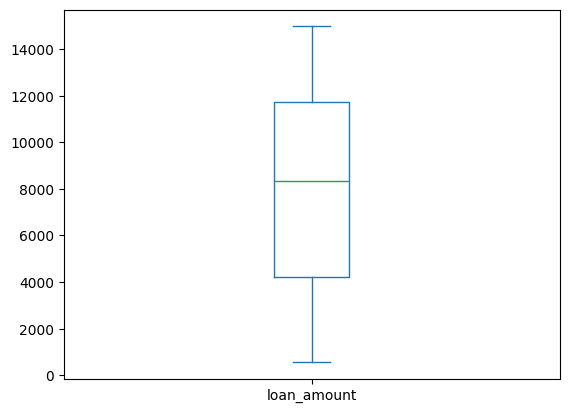

In [14]:
# For loan_amount 
df['loan_amount'].plot(kind='box')
plt.show()

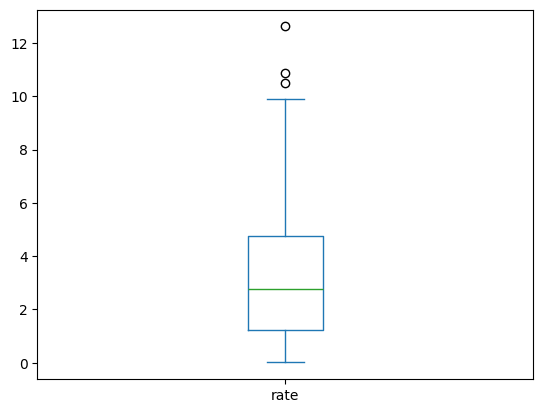

In [15]:
# For rate 
df['rate'].plot(kind='box')
plt.show()

### 8. Transformation

### 8a. SQRT transformation


In [16]:
#perform square root transformation of rate column and store it a new column named SQRT_RATE
df['SQRT_RATE'] = np.sqrt(df['rate'])

# Display the updated DataFrame
df[['rate', 'SQRT_RATE']].head()

,rate,SQRT_RATE
client_id,,
46109,2.15,1.466288
46109,1.25,1.118034
46109,0.68,0.824621
46109,1.24,1.113553
46109,3.13,1.769181


In [17]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [18]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

print('')

print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039


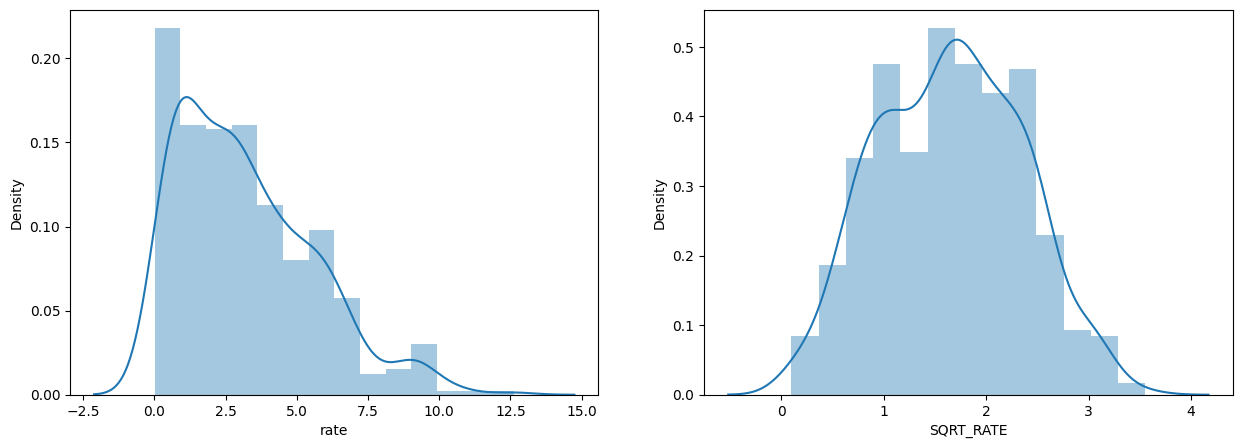

In [20]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])

plt.show()


### 8b. Log Transformation


In [21]:
# Apply Log transformation of the rate column by taking log of column and storing it in Log Rateee
# Apply log transformation on the 'rate' column
df['Log Rateee'] = np.log(df['rate'])

# Display the transformed values
df[['rate', 'Log Rateee']].head()

,rate,Log Rateee
client_id,,
46109,2.15,0.765468
46109,1.25,0.223144
46109,0.68,-0.385662
46109,1.24,0.215111
46109,3.13,1.141033


In [ ]:
df.head()

In [27]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewness of the LOG transformed data is {}".format(df['LOG_Rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['LOG_Rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewness of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


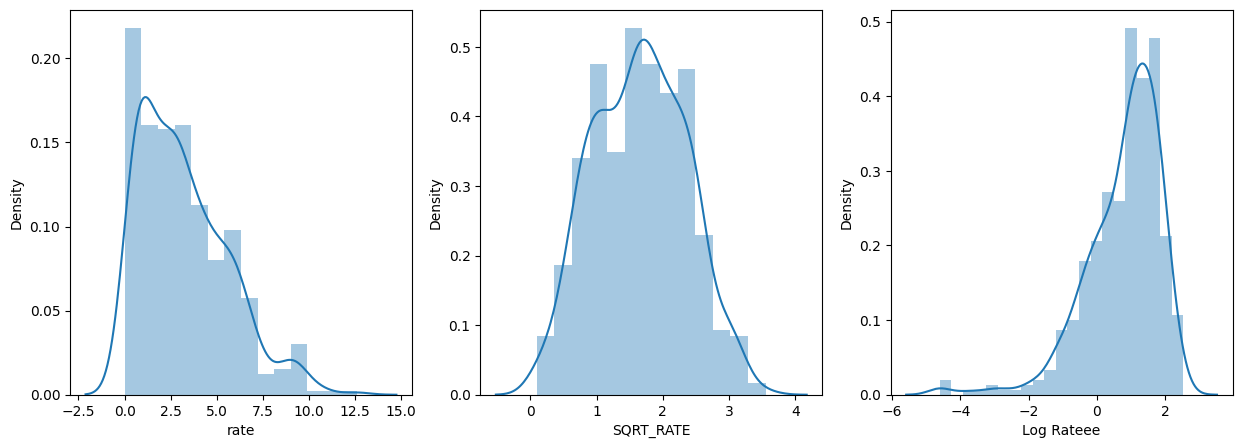

In [24]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rateee'], ax=axes[2])

plt.show()

In [25]:
## Using Lambda function :

df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [26]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rateee,LOG_Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,1.141033


---


### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed


In [28]:
# loading the dataset and setting client id as index

df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [29]:
# Apply Z-Score Transformation on the rate column and store it in a new column named ZR
df['ZR'] = (df['rate'] - df['rate'].mean()) / df['rate'].std()

# Display the original and transformed values
df[['rate', 'ZR']].head()

,rate,ZR
client_id,,
46109,2.15,-0.445174
46109,1.25,-0.820617
46109,0.68,-1.058397
46109,1.24,-0.824788
46109,3.13,-0.036358


---


### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.


In [31]:
# Implement IQR method to Detect outliers and their ranges
# Step 1: Calculate Q1 and Q3
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)

# Step 2: Compute IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Display outlier range
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Step 5: Find outliers
outliers = df[(df['rate'] < lower_bound) | (df['rate'] > upper_bound)]

# Step 6: Show number of outliers and some examples
print(f"Number of outliers: {outliers.shape[0]}")
outliers[['rate']].head()

IQR: 3.5300000000000002
Lower bound for outliers: -4.075
Upper bound for outliers: 10.045
Number of outliers: 3


,rate
client_id,
41480,10.49
48177,10.89
49624,12.62


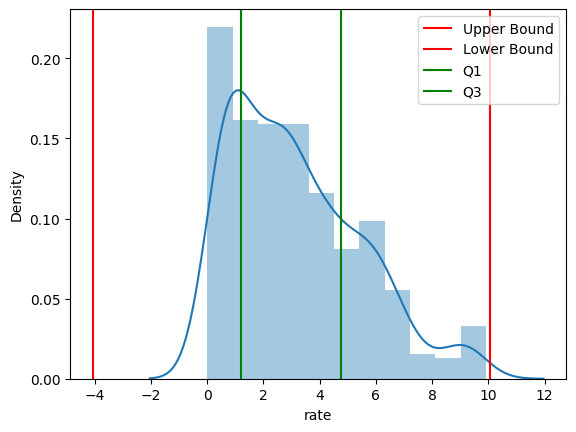

In [33]:
# Define df3 by removing outliers using the IQR method
df3 = df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

## Plot
sns.distplot(df3.rate)
plt.axvline(upper_bound, color='r', label='Upper Bound')
plt.axvline(lower_bound, color='r', label='Lower Bound')
plt.axvline(Q1, color='g', label='Q1')
plt.axvline(Q3, color='g', label='Q3')
plt.legend()
plt.show()

In [28]:
# Define the outliers DataFrame
outliers = df[(df['rate'] < lower_bound) | (df['rate'] > upper_bound)]

# Find count of Outliers wrt IQR
print("Count of Outliers wrt IQR:")
print(outliers['rate'].count())


Count of Outliers wrt IQR:
3


In [16]:
# Remove the outliers using the IQR method
df_no_outliers = df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

# Display the shape of the DataFrame without outliers
df_no_outliers.shape


(440, 7)

In [17]:
# Store the clean data wrt IQR in a new DataFrame
df_iqr_cleaned = df[(df['rate'] >= lower_bound) & (df['rate'] <= upper_bound)]

# Display the shape of the cleaned DataFrame
df_iqr_cleaned.shape


(440, 7)

In [ ]:
df3.shape

(440, 7)

In [19]:
# Define df4 as a copy of df_iqr_cleaned
df4 = df_iqr_cleaned.copy()

# Check the shape of df4
df4.shape

(440, 7)

<Axes: ylabel='rate'>

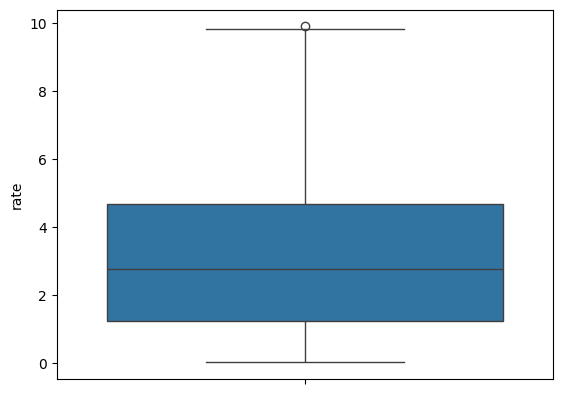

In [26]:
## Box Plot for rate--- based on IQR Method
sns.boxplot(df4.rate)
##plt.show()

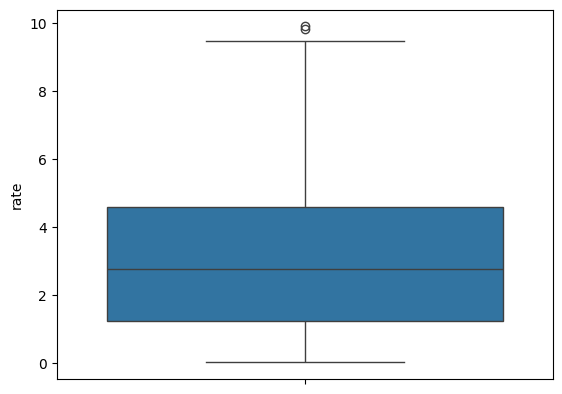

In [49]:
# Define df2 by removing outliers using the Z-score method
df2 = df[(df['ZR'] >= -3) & (df['ZR'] <= 3)]

# Box Plot for rate --- based on Z-score cleaned data 
sns.boxplot(df2.rate)
plt.show()

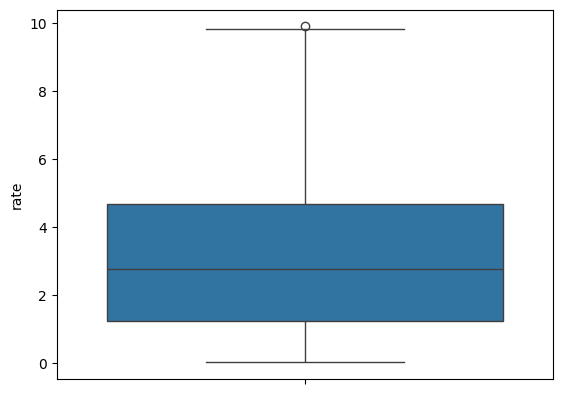

In [50]:
# Box Plot for rate --- based on IQR cleaned data 

sns.boxplot(df4.rate)
plt.show()

---


### 9. Scaling the Numerical Features

There are two ways to scale the data:

1. Standardization (Z-Score)\
2. Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.


### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:


In [51]:
# Calculate mean and standard deviation of the 'rate' column
mean_rate = df['rate'].mean()
std_rate = df['rate'].std()

# Apply Z-Score standardization
df['Standardized_Rate'] = (df['rate'] - mean_rate) / std_rate

# Display the updated DataFrame
df[['rate', 'Standardized_Rate']].head()




,rate,Standardized_Rate
client_id,,
46109,2.15,-0.434915
46109,1.25,-0.824098
46109,0.68,-1.070580
46109,1.24,-0.828422
46109,3.13,-0.011139


In [52]:
# Standardization (Z-Score) for loan_amount
mean_loan_amount = df['loan_amount'].mean()
std_loan_amount = df['loan_amount'].std()
df['Standardized_Loan_Amount'] = (df['loan_amount'] - mean_loan_amount) / std_loan_amount

# Normalization (Min-Max Scaling) for loan_amount
min_loan_amount = df['loan_amount'].min()
max_loan_amount = df['loan_amount'].max()
df['Normalized_Loan_Amount'] = (df['loan_amount'] - min_loan_amount) / (max_loan_amount - min_loan_amount)

# Display the updated DataFrame
df[['loan_amount', 'Standardized_Loan_Amount', 'Normalized_Loan_Amount']].head()


,loan_amount,Standardized_Loan_Amount,Normalized_Loan_Amount
client_id,,,
46109,13672,1.372489,0.909867
46109,9794,0.439355,0.640785
46109,12734,1.146785,0.844782
46109,12518,1.094811,0.829795
46109,14049,1.463203,0.936026


In [23]:
# Step 1 : Calculate mean and standard deviation of the 'rate' column
mean_rate = df['rate'].mean()
std_rate = df['rate'].std()

# Step 2 : Transform using Z-score
df['Z_Score_Rate'] = (df['rate'] - mean_rate) / std_rate

# Display the updated DataFrame
df[['rate', 'Z_Score_Rate']].head()


,rate,Z_Score_Rate
client_id,,
46109,2.15,-0.445174
46109,1.25,-0.820617
46109,0.68,-1.058397
46109,1.24,-0.824788
46109,3.13,-0.036358


In [54]:
df3.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rateee,LOG_Rate,ZR
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0.765468,-0.445174
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0.223144,-0.820617
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-0.385662,-1.058397
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,0.215111,-0.824788
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,1.141033,-0.036358


### 6b. Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:


In [55]:
# ForeRate: Calculate ForeRate as the square of the rate column
df['ForeRate'] = df['rate'] ** 2

# Display the updated DataFrame
df[['rate', 'ForeRate']].head()


,rate,ForeRate
client_id,,
46109,2.15,4.6225
46109,1.25,1.5625
46109,0.68,0.4624
46109,1.24,1.5376
46109,3.13,9.7969


---


### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using:

1. pd.get_dummies\
2. sklearn's in-built function of OneHotEncoder and LabelEncoder


In [57]:
# Encoding the 'loan_type' column using pd.get_dummies
encoded_loan_type = pd.get_dummies(df['loan_type'], prefix='loan_type', drop_first=True)

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_loan_type], axis=1)

# Display the updated DataFrame
df_encoded.head()



,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rateee,LOG_Rate,ZR,Standardized_Rate,Standardized_Loan_Amount,Normalized_Loan_Amount,Z_Score_Rate,ForeRate,loan_type_credit,loan_type_home,loan_type_other
client_id,,,,,,,,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0.765468,-0.445174,-0.434915,1.372489,0.909867,-0.434915,4.6225,False,True,False
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0.223144,-0.820617,-0.824098,0.439355,0.640785,-0.824098,1.5625,True,False,False
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-0.385662,-1.058397,-1.070580,1.146785,0.844782,-1.070580,0.4624,False,True,False
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,0.215111,-0.824788,-0.828422,1.094811,0.829795,-0.828422,1.5376,False,False,False
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,1.141033,-0.036358,-0.011139,1.463203,0.936026,-0.011139,9.7969,True,False,False


In [58]:
# Repaid is also a category column, creating dummies for it
repaid_dummies = pd.get_dummies(df['repaid'], prefix='repaid', drop_first=True)

# Concatenate the dummies with the original DataFrame
df = pd.concat([df, repaid_dummies], axis=1)

# Display the updated DataFrame
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,Log Rateee,LOG_Rate,ZR,Standardized_Rate,Standardized_Loan_Amount,Normalized_Loan_Amount,Z_Score_Rate,ForeRate,repaid_1
client_id,,,,,,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468,0.765468,-0.445174,-0.434915,1.372489,0.909867,-0.434915,4.6225,False
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144,0.223144,-0.820617,-0.824098,0.439355,0.640785,-0.824098,1.5625,False
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662,-0.385662,-1.058397,-1.070580,1.146785,0.844782,-1.070580,0.4624,True
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111,0.215111,-0.824788,-0.828422,1.094811,0.829795,-0.828422,1.5376,True
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033,1.141033,-0.036358,-0.011139,1.463203,0.936026,-0.011139,9.7969,True


### 1) pd.get_dummies approach:


In [60]:
dummy_cat = pd.get_dummies(df['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
client_id,,,
46109,False,True,False
46109,True,False,False
46109,False,True,False
46109,False,False,False
46109,True,False,False


---


### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan


In [61]:
# Calculate the tenure of the loan in days
df['loan_tenure_days'] = (df['loan_end'] - df['loan_start']).dt.days

# Optionally, calculate the tenure in years
df['loan_tenure_years'] = df['loan_tenure_days'] / 365

# Display the updated DataFrame
df[['loan_start', 'loan_end', 'loan_tenure_days', 'loan_tenure_years']].head()

,loan_start,loan_end,loan_tenure_days,loan_tenure_years
client_id,,,,
46109,2002-04-16,2003-12-20,613,1.679452
46109,2003-10-21,2005-07-17,635,1.739726
46109,2006-02-01,2007-07-05,519,1.421918
46109,2010-12-08,2013-05-05,879,2.408219
46109,2010-07-07,2012-05-21,684,1.873973


---
